## Problem statement

Vivendo is a fast food chain in Brazil with over 200 outlets.
Customers often claim compensation from the company for food poisoning.
The legal team processes these claims. The legal team has offices in four locations.
The legal team wants to improve how long it takes to reply to customers and close claims.
The head of the legal department wants a report on how each location differs in the time it takes to close claims.

## Import libraries / Data

In [42]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
df = pd.read_csv("data/food_claims_2212.csv")

In [20]:
df.shape
# Whe have 2000 rows and 8 variables

(2000, 8)

In [3]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [4]:
df.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [9]:
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


## Task 1 : Check columns data quality

**claim_id** : No missing values due to the database structure.

**time_to_close** : No missing values and no changes made to this column.

**claim_amount** : No missing values, but we needed the transform values for them to meet the description, by removing the R$* monetary symbol.

**amount_paid** : There were 36 missing values and we have to replace them with the median.

**location** : There were no missing values for that colum and the values provided by the description where exactly the same. No changes needed.

**individuals_on_claim** : there are no missing values and the min value was effectivelly 1 as provided by the description. No changes needed.

**linked_cases**: There were 26 missing values. So they were replaced with the value False. 

**cause** : No missing values here, but some of them were not matching the description provided so we replaced them whith the correct ones.

In [8]:
# time_to_close
df["time_to_close"].isna().sum()
# the are no missing values. No changes made to this column

0

In [12]:
# there were no missing values but we need the transform that values for them to meet the description
df["claim_amount"] = df["claim_amount"].str.replace("R$ ","", regex = False).astype(float)

In [21]:
# there were 36 missing values and we have to replace them with the median
df["amount_paid"].isna().sum()
med = np.nanmedian(df["amount_paid"])
df.loc[df["amount_paid"].isna(),"amount_paid"] = med

In [26]:
# there were no missing values for that colum and the values provided by the description where exactly the same
set(df["location"])

{'FORTALEZA', 'NATAL', 'RECIFE', 'SAO LUIS'}

In [28]:
# there are no missing values and the min value was effectivelly 1 as provided by the description
df["individuals_on_claim"].describe()

count    2000.000000
mean        8.049500
std         4.087347
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: individuals_on_claim, dtype: float64

In [31]:
set(df["linked_cases"])

{False, True, nan}

In [32]:
# There were 26 missing values. So they were replaced with the value False
df.loc[df["linked_cases"].isna(), "linked_cases"] = False

In [39]:
# No missing values here, but some of them were not matching the description
# provided so we replaced them whith the correct ones
df["cause"] = df["cause"].str.replace("Meat","meat")
df["cause"] = df["cause"].str.replace("VEGETABLES","vegetable")
df["cause"] = df["cause"].str.replace(" meat","meat")

In [40]:
# No the column match the description provided
set(df["cause"])

{'meat', 'unknown', 'vegetable'}

## Task 2 : Create a visualization that shows the number of claims in each location

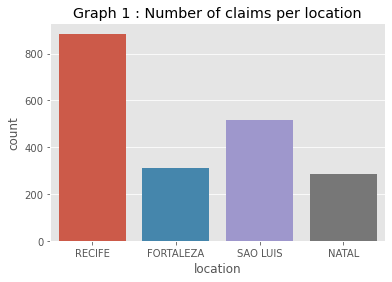

In [45]:
style.use('ggplot')
sns.countplot(x = df["location"]).set(title="Graph 1 : Number of claims per location")
plt.show()

There are four possible locatons in this data. The most common is **RECIFE**, with **SAO LUIS** being the second. The location categories are unbalanced, with most observations being either **RECIFE** or **SAO LUIS**. The legal team shoykd focus on improving how long it takes to reply to customers and close claims in that two locations as they are more common.

## Task 3 : Describe the distribution of time to close for all claims

Looking at the graph below, we can see that most of the claims where closed between approximately 15O days and 250 days.
The distribution of the time to close a claim is a bit right skewed. There a are some outliers claims that take more that 400 days to get closed. 
When looking for claims that time to close needs to be improved, the team should aim for claims having over 250 days, but be aware they may need to work with 200 days or more.

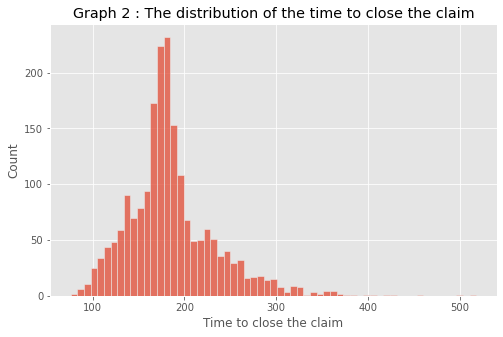

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(x = df["time_to_close"]).set(title="Graph 2 : The distribution of the time to close the claim")
plt.xlabel("Time to close the claim");

## Task 4 : Describe the relationship between time to close and location

Finally we want to combine the two pieces of information to see how the location impacts the time to close a claim. In order to see whether or no the number of claims in a given location impacts on the distribution of the time to close the claim in that location.
When looking at the graph below, we can see that the the distributions of the time to close the claim is not so different in each Location.
The Kruskal test was made to check whether the time to close a claim differs significantly according to the locations.

In [82]:
pg.kruskal(data=df, dv="time_to_close", between="location")

,Source,ddof1,H,p-unc
Kruskal,location,3,1.153223,0.764244


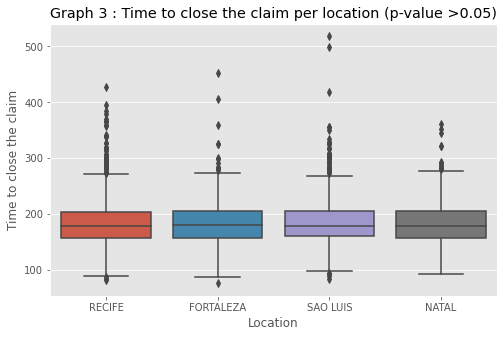

In [83]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="location", y = "time_to_close").set(title="Graph 3 : Time to close the claim per location (p-value >0.05)")
plt.xlabel("Location")
plt.ylabel("Time to close the claim");